In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as lr
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split as tts
from sklearn import datasets
from sklearn.decomposition import PCA

[0.94061816 0.05938184]


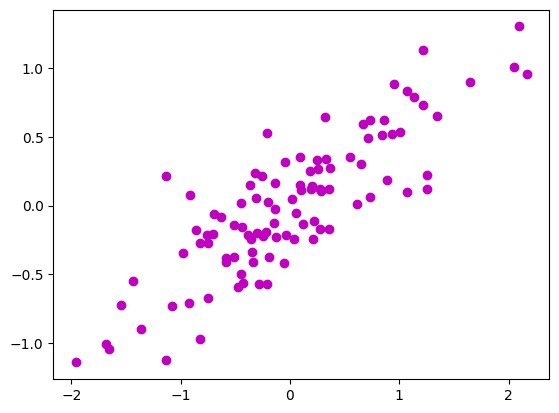

In [2]:
#Varianz ausgeben
data = np.loadtxt('data/decomp_test.dat', delimiter=',')
model = PCA(n_components=2)
model.fit(data)
print(model.explained_variance_ratio_) #hier: 94.06% entlang der ersten Hauptkomponente, 5.94% entlang der zweiten Hauptkomponente --> 100%
plt.plot(data[:,0], data[:,1], 'mo')
plt.show()

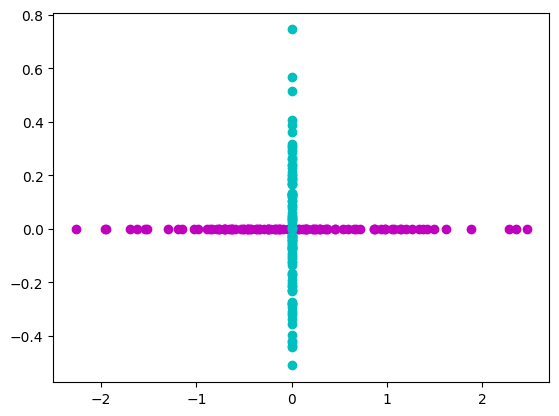

In [3]:
#Punkte auf Houptkomponenten (Achsen) projezieren
model = PCA(n_components=2)
data_proj = model.fit_transform(data)
y = np.zeros([len(data_proj)])
plt.plot(data_proj[:,0], y, 'mo') #y ist 0, nur auf einer Ebene darstellen, hier X-Achse
plt.plot(y, data_proj[:,1], 'co') #y ist 0, nur auf einer Ebene darstellen, hier Y-Achse
plt.show()

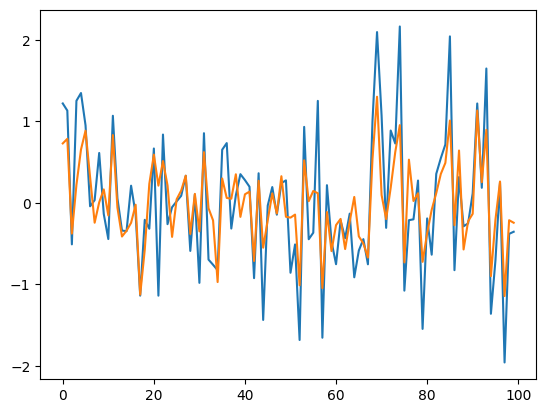

In [5]:
#Projektion umkehren
data_recovered = model.inverse_transform(data_proj) #Transpornierte Matrix
plt.plot(data_recovered)
plt.show()

In [9]:
#Praktische Übung
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

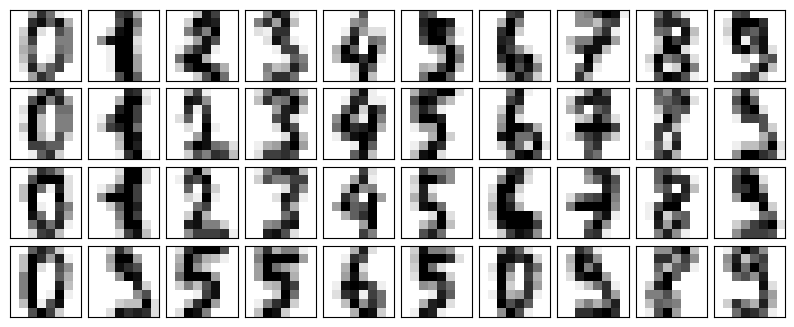

In [10]:
from myplot import plot_digits
plot_digits(digits.data)
plt.show()

In [11]:
#Dimensionsreduktion
from sklearn.decomposition import PCA
model = PCA(n_components=2) #in 2 Dimensionen
d_proj = model.fit_transform(digits.data)
print("var:", model.explained_variance_ratio_) #Differenz zu 1 ist Verlust der Information

var: [0.14890594 0.13618771]


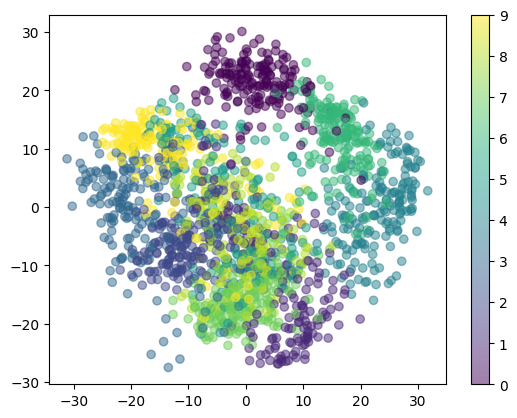

In [32]:
plt.scatter(d_proj[:,0], d_proj[:,1],
c=digits.target, alpha=0.5)
cmap=plt.cm.get_cmap('nipy_spectral', 10)
plt.colorbar()
plt.show() #--> Anwendung k-nearest-Neighbour

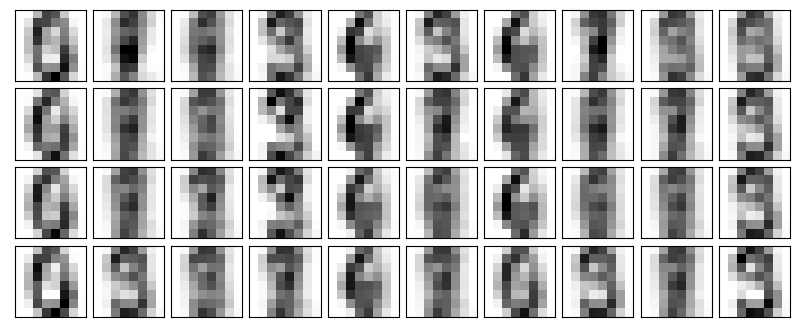

In [33]:
d_recov = model.inverse_transform(d_proj)
plot_digits(d_recov)
plt.show()

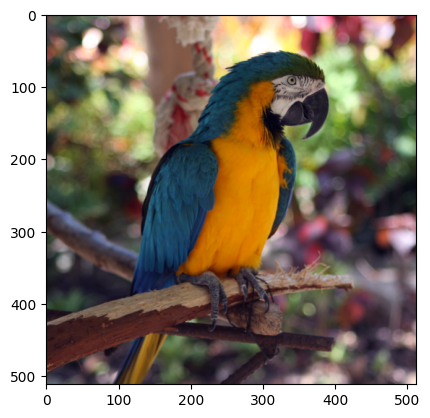

ValueError: Found array with dim 3. PCA expected <= 2.

In [17]:
#praktische Übung 2
img = plt.imread('data/papa_color.png')
plt.imshow(img, cmap='gray')
plt.show()

model = PCA()
model.fit(img)
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.show()

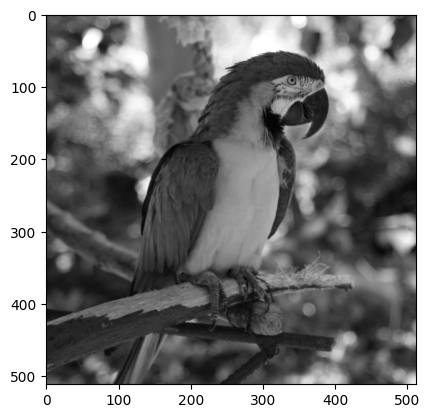

In [39]:
img = plt.imread('data/papa_gray.png')
plt.imshow(img, cmap='gray')
plt.show()

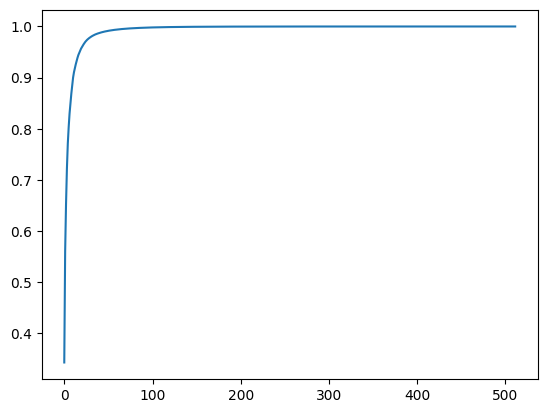

In [40]:
model = PCA()
model.fit(img)
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.show()

47


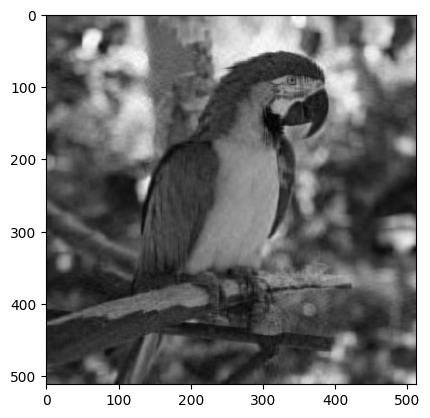

In [55]:
model = PCA(0.99)   #Wert eintragen
img_rec = model.inverse_transform(model.fit_transform(img))
plt.imshow(img_rec, cmap='gray')
print(model.n_components_)
plt.show()

11


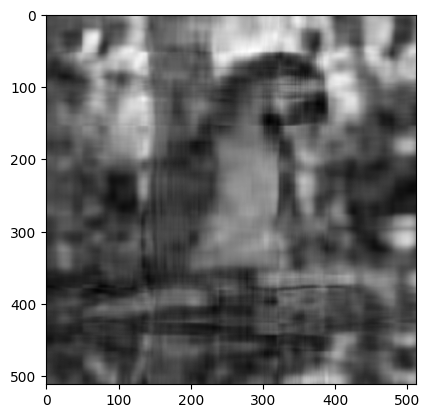

In [56]:
model = PCA(0.90)   #Wert eintragen
img_rec = model.inverse_transform(model.fit_transform(img))
plt.imshow(img_rec, cmap='gray')
print(model.n_components_)
plt.show()

197


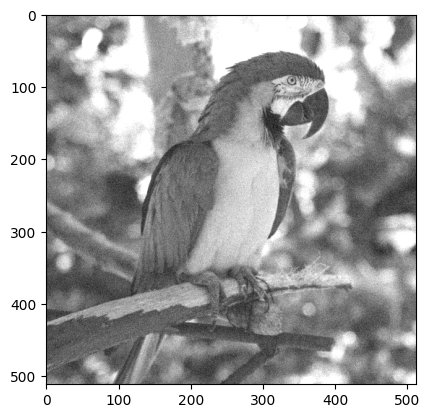

In [63]:
noise = plt.imread('data/papa_noise.png')
plt.imshow(img, cmap='gray')
print(model.n_components_)
plt.show()

197


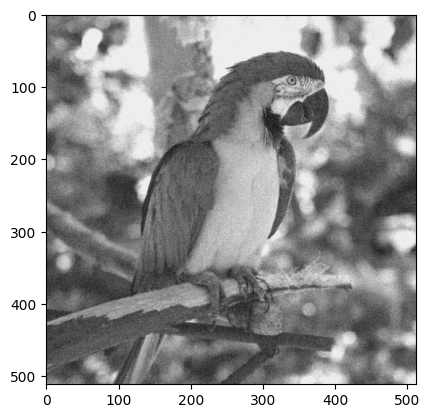

In [62]:
model = PCA(0.99)
de_noise = model.inverse_transform(model.fit_transform(noise))
plt.imshow(de_noise, cmap='gray')
print(model.n_components_)
plt.show()

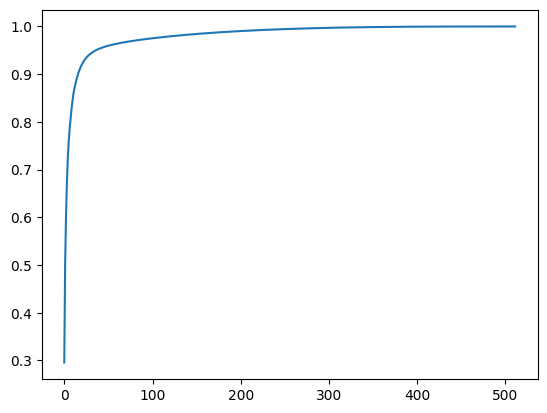

In [68]:
model = PCA()
model.fit(noise)
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.show()